In [2]:
import seaborn as sb
import matplotlib.pyplot as mpl
import numpy as np
import pandas as pd
import math as m

# Загрузка данных

In [3]:
df = pd.read_csv('./data/real_estate_data.csv')
df.head()

C:\Users\VPR\AppData\Local\Temp\ipykernel_17536\3523524844.py:1: DtypeWarning: Columns (9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/real_estate_data.csv')


,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
1,2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY


In [87]:
df[df.address == 'Adana/Aladağ/Akören']

,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price


# Предварительный анализ

In [4]:
df.shape

(403487, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403487 entries, 0 to 403486
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 403487 non-null  int64  
 1   type               403487 non-null  object 
 2   sub_type           403487 non-null  object 
 3   start_date         403487 non-null  object 
 4   end_date           266298 non-null  object 
 5   listing_type       403487 non-null  int64  
 6   tom                403487 non-null  int64  
 7   building_age       376097 non-null  object 
 8   total_floor_count  375466 non-null  object 
 9   floor_no           368191 non-null  object 
 10  room_count         403487 non-null  object 
 11  size               257481 non-null  float64
 12  address            403487 non-null  object 
 13  furnished          0 non-null       float64
 14  heating_type       375517 non-null  object 
 15  price              402772 non-null  float64
 16  pr

Много объектовых типов данных, нужно будет анализировать все и кодировать

Но пока что посмотрим на значения поля id, скорее всего это индекс поле, что нам не требуется

In [6]:
len(df.id.unique())

403487

Количество совпадает с записями, поле нам не нужно

Так же сразу уберу поле furnished, так как оно полностью пустое

In [7]:
df = df.drop(columns=['id','furnished'])

In [8]:
for column in df.columns:
    print('---------')
    print(column.upper())
    print('=========')
    print(df[column].value_counts())
    print('Total unique count: {}'.format(len(df[column].unique())))
    print('---------')


---------
TYPE
type
Konut    403487
Name: count, dtype: int64
Total unique count: 1
---------
---------
SUB_TYPE
sub_type
Daire                  354549
Villa                   21324
Müstakil Ev              9563
Rezidans                 7716
Yazlık                   5929
Komple Bina              2607
Prefabrik Ev              679
Çiftlik Evi               528
Köşk / Konak / Yalı       301
Yalı Dairesi              187
Kooperatif                 70
Loft                       34
Name: count, dtype: int64
Total unique count: 12
---------
---------
START_DATE
start_date
10/11/18    4064
9/26/18     3892
10/17/18    3846
10/5/18     3832
10/2/18     3630
            ... 
12/30/18     721
2/17/19      712
1/27/19      672
1/1/19       635
2/3/19       630
Name: count, Length: 181, dtype: int64
Total unique count: 181
---------
---------
END_DATE
end_date
12/19/18    3048
1/18/19     2866
2/20/19     2831
2/9/19      2785
2/1/19      2747
            ... 
9/9/18       120
9/3/18       109
9/1

Сбросим тип, так как всего одно значение

In [9]:
df = df.drop(columns=['type'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403487 entries, 0 to 403486
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sub_type           403487 non-null  object 
 1   start_date         403487 non-null  object 
 2   end_date           266298 non-null  object 
 3   listing_type       403487 non-null  int64  
 4   tom                403487 non-null  int64  
 5   building_age       376097 non-null  object 
 6   total_floor_count  375466 non-null  object 
 7   floor_no           368191 non-null  object 
 8   room_count         403487 non-null  object 
 9   size               257481 non-null  float64
 10  address            403487 non-null  object 
 11  heating_type       375517 non-null  object 
 12  price              402772 non-null  float64
 13  price_currency     402772 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 43.1+ MB


Теперь посмотрим количество пропусков, может что то еще нужно сбросить

In [11]:
def get_na_percentage(column: str) -> float:
    total_count = len(df)
    isna_count = df[column].isna().sum()
    return isna_count / total_count * 100

In [12]:
def show_na_percentage():
  for column in df.columns:
    percentage = get_na_percentage(column)
    print(f'{column} has {percentage:.4f}% empty values')    

In [13]:
show_na_percentage()

sub_type has 0.0000% empty values
start_date has 0.0000% empty values
end_date has 34.0008% empty values
listing_type has 0.0000% empty values
tom has 0.0000% empty values
building_age has 6.7883% empty values
total_floor_count has 6.9447% empty values
floor_no has 8.7477% empty values
room_count has 0.0000% empty values
size has 36.1860% empty values
address has 0.0000% empty values
heating_type has 6.9321% empty values
price has 0.1772% empty values
price_currency has 0.1772% empty values


Большое количество пропусков в end_date нормально, а в размерах это много

Тк же пропуски в целевой переменной(price) не должны присутствовать, так как при заполнении они могут повлиять на результат. По этому они будут сброшены

В добавок количество записей позволяет на сделать это

In [14]:
df = df.dropna(subset='price', how='all')

In [15]:
df.price

0             3500.0
1           490000.0
2           155000.0
3         32500000.0
4          1450000.0
             ...    
403482        1500.0
403483      120000.0
403484       48000.0
403485         900.0
403486      210000.0
Name: price, Length: 402772, dtype: float64

Еще сброшу записи без валюты, потому что потом они будут влиять на цену

In [16]:
df = df.dropna(subset='price_currency', how='all')


In [17]:
df.price.isna()

0         False
1         False
2         False
3         False
4         False
          ...  
403482    False
403483    False
403484    False
403485    False
403486    False
Name: price, Length: 402772, dtype: bool

## Заполнение пропусков

In [18]:
black_list=['end_date']

for column in df.columns:
    percentage = get_na_percentage(column)
    if percentage == 0:
        continue
    
    if column in black_list:
        continue
    if df[column].dtype in [np.float64, np.int64, np.float32, np.int32]:
      df[column] = df[column].fillna(df[column].median())
    else: 
      df[column] = df[column].fillna(df[column].mode()[0])

In [19]:
show_na_percentage()

sub_type has 0.0000% empty values
start_date has 0.0000% empty values
end_date has 33.8837% empty values
listing_type has 0.0000% empty values
tom has 0.0000% empty values
building_age has 0.0000% empty values
total_floor_count has 0.0000% empty values
floor_no has 0.0000% empty values
room_count has 0.0000% empty values
size has 0.0000% empty values
address has 0.0000% empty values
heating_type has 0.0000% empty values
price has 0.0000% empty values
price_currency has 0.0000% empty values


## Кодирование параментров

Значения большинства колонок не несут большого смысла для обратной расшифровки, они будут кодироваться автоматически

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402772 entries, 0 to 403486
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sub_type           402772 non-null  object 
 1   start_date         402772 non-null  object 
 2   end_date           266298 non-null  object 
 3   listing_type       402772 non-null  int64  
 4   tom                402772 non-null  int64  
 5   building_age       402772 non-null  object 
 6   total_floor_count  402772 non-null  object 
 7   floor_no           402772 non-null  object 
 8   room_count         402772 non-null  object 
 9   size               402772 non-null  float64
 10  address            402772 non-null  object 
 11  heating_type       402772 non-null  object 
 12  price              402772 non-null  float64
 13  price_currency     402772 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 46.1+ MB


In [22]:
df.floor_no = df.floor_no.astype(str)

Там попадаются и числа, и строки, кодер ломается на их сравнении

Кроме валюты цены, потому что потом планирую приводить все цены в одну валюту

In [23]:
column_encoder = {}

def encode_columns(columns: list[str]):
    for column in columns:
      encoder = LabelEncoder()
      print(column)
      df[column] = encoder.fit_transform(df[column])
      column_encoder[column] = encoder



In [24]:
simple_coding_columns = ['sub_type', 'end_date',
                         'address', 'heating_type', 
                         'building_age',
                         'total_floor_count']

encode_columns(simple_coding_columns)

sub_type
end_date
address
heating_type
building_age
total_floor_count


In [25]:
encoder:LabelEncoder  = column_encoder['building_age']
encoder.classes_

array(['0', '1', '11-15 arası', '16-20 arası', '2', '21-25 arası',
       '26-30 arası', '3', '31-35 arası', '36-40 arası', '4',
       '40 ve üzeri', '5', '6-10 arası'], dtype=object)

Кодируем валюту

In [26]:
df.price_currency.unique()

array(['TRY', 'GBP', 'EUR', 'USD'], dtype=object)

In [27]:
currency_dict = {
    'TRY': 0,
    "GBP": 1,
    'EUR': 2,
    'USD': 3
}

In [28]:
reverse_currency_dict = {
    0: 'TRY',
    1: "GBP",
    2: 'EUR',
    3: 'USD'
}

In [29]:
df.price_currency = df.price_currency.map(currency_dict)

Номер этажа нужно кодировать руками, потому что там есть схожие значения

In [30]:
df.floor_no.unique()

array(['2', '20 ve üzeri', 'Yüksek Giriş', '10', '14', 'Kot 2',
       'Asma Kat', 'Bahçe katı', '11', '3', '13', '7', '16', 'Müstakil',
       'Zemin Kat', '19', '4', '5', 'En Üst Kat', '8', '15', '1',
       'Giriş Katı', '9', 'Çatı Katı', '12', '17', '6', 'Kot 4', 'Kot 1',
       'Kot 3', '18', 'Teras Kat', 'Komple', 'Bodrum Kat'], dtype=object)

In [31]:


floor_no_dict = {
    '2': 2, '20 ve üzeri': 20, 'Yüksek Giriş': 1, '10': 10, '14': 14, 'Asma Kat': -1,
    'Bahçe katı': 1, '11': 11, '3': 3, '13': 13, '7': 7, '16': 16, 'Müstakil': 1, 'Zemin Kat': 1,
    '19': 19, '4': 4, '5': 5, 'En Üst Kat': -1, '8': 8, '15': 15, '1': 1, 'Giriş Katı': 1, '9': 9,
    'Çatı Katı': -1, '12': 12, '17': 17, '6': 6, 'Kot 4': 4, 'Kot 2': 2, 'Kot 1': 1, 'Kot 3': 3,
    '18': 18, 'Teras Kat': 1, 'Komple': -1, 'Bodrum Kat': 0,
    '10-20 arası': 10,
}

In [32]:
df.floor_no = df.floor_no.map(floor_no_dict)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402772 entries, 0 to 403486
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sub_type           402772 non-null  int32  
 1   start_date         402772 non-null  object 
 2   end_date           402772 non-null  int32  
 3   listing_type       402772 non-null  int64  
 4   tom                402772 non-null  int64  
 5   building_age       402772 non-null  int32  
 6   total_floor_count  402772 non-null  int32  
 7   floor_no           402772 non-null  int64  
 8   room_count         402772 non-null  object 
 9   size               402772 non-null  float64
 10  address            402772 non-null  int32  
 11  heating_type       402772 non-null  int32  
 12  price              402772 non-null  float64
 13  price_currency     402772 non-null  int64  
dtypes: float64(2), int32(6), int64(4), object(2)
memory usage: 36.9+ MB


In [34]:
df

,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
0,7,12/10/18,30,2,30,0,4,2,2+1,90.0,6708,0,3500.0,0
1,0,2/13/19,181,1,14,0,4,20,1+0,43.0,6708,0,490000.0,0
2,0,10/9/18,90,1,30,0,0,1,2+1,110.0,5655,0,155000.0,0
3,7,9/10/18,32,1,30,7,4,20,6+1,450.0,6494,0,32500000.0,0
4,7,12/10/18,30,1,30,0,4,2,2+1,90.0,6708,0,1450000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,0,9/18/18,181,2,162,0,6,2,+,110.0,6896,8,1500.0,0
403483,0,10/11/18,181,1,139,0,6,2,2+1,110.0,5133,8,120000.0,0
403484,0,11/22/18,181,1,97,0,6,2,1+1,110.0,909,8,48000.0,2
403485,0,2/21/19,181,2,6,0,6,2,2+1,2.0,1312,8,900.0,0


Теперь после предобработки, можно приступать к анализу

Приведение цены к одной валюте

Я будут приводить все к турецкой лире, так как это гос валюта страны 

In [35]:
%pip install easy_exchange_rates
from easy_exchange_rates import API
from datetime import datetime

Note: you may need to restart the kernel to use updated packages.


In [36]:
def get_iso_date(d:str) -> str:
    return datetime.strptime(d,  '%m/%d/%y').date().isoformat()

Теперь отсортируем даты для удобства их использования

In [37]:
converted_dates = []

for start_date in df.start_date:
    date = get_iso_date(start_date)
    converted_dates.append(date)

converted_dates.sort() 

Получаем курс валют относительно турецкой лиры

In [38]:
api = API()
BASE_CURRENCY = 'TRY'
TARGET_CURRENCIES = ['TRY', 'USD', 'EUR', 'GBP']

rates = api.get_exchange_rates(base_currency=BASE_CURRENCY, start_date=converted_dates[0], end_date=converted_dates[-1], targets=TARGET_CURRENCIES)

reates_df = api.to_dataframe(rates)

In [39]:
reates_df

,USD,GBP,TRY,EUR
2018-08-31,0.148525,0.114147,1.0,0.127325
2018-09-01,0.148525,0.114147,1.0,0.127325
2018-09-02,0.148525,0.114147,1.0,0.127325
2018-09-03,0.151877,0.117498,1.0,0.130917
2018-09-04,0.151194,0.117479,1.0,0.130171
...,...,...,...,...
2019-02-23,0.188069,0.144165,1.0,0.165802
2019-02-24,0.188069,0.144165,1.0,0.165802
2019-02-25,0.188037,0.143904,1.0,0.165788
2019-02-26,0.188637,0.143651,1.0,0.165937


Приводим все к турекцой лире

In [40]:
for index, row in df[df.price_currency != currency_dict['TRY']].iterrows():
    start_date = get_iso_date(row['start_date'])
    price_currency = reverse_currency_dict[row['price_currency']]
    multiplier = reates_df[reates_df.index == start_date][price_currency][0]
    df.loc[index, 'price'] = df.loc[index, 'price'] / multiplier


df = df.drop(columns=['price_currency'])

In [41]:
df[df.index == 9]

,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price
9,0,12/26/18,110,1,0,1,0,-1,2+2,550.0,6642,0,564408.301068


Теперь цены находятся в одной валюте, что очень удобно и должно сказаться на работе модели

Теперь кодируем дату и можно чистить данные

In [42]:
encode_columns(['start_date'])

start_date


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402772 entries, 0 to 403486
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sub_type           402772 non-null  int32  
 1   start_date         402772 non-null  int32  
 2   end_date           402772 non-null  int32  
 3   listing_type       402772 non-null  int64  
 4   tom                402772 non-null  int64  
 5   building_age       402772 non-null  int32  
 6   total_floor_count  402772 non-null  int32  
 7   floor_no           402772 non-null  int64  
 8   room_count         402772 non-null  object 
 9   size               402772 non-null  float64
 10  address            402772 non-null  int32  
 11  heating_type       402772 non-null  int32  
 12  price              402772 non-null  float64
dtypes: float64(2), int32(7), int64(3), object(1)
memory usage: 40.3+ MB


In [44]:
def sum_count(pair:str) -> int:
    one, two = pair.split('+')
    if not one or not two:
        return 0
    return sum(map(int, [one, two]))


df.room_count = df.room_count.map(sum_count)
df = df.drop(df[df.room_count == 0].index)

# Анализ

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sub_type,400445.0,0.859087,2.437428e+00,0.0,0.0,0.0,0.0,1.100000e+01
start_date,400445.0,91.595500,5.151329e+01,0.0,48.0,86.0,139.0,1.800000e+02
end_date,400445.0,114.883567,6.145266e+01,0.0,65.0,124.0,181.0,1.810000e+02
listing_type,400445.0,1.294969,4.675854e-01,1.0,1.0,1.0,2.0,3.000000e+00
tom,400445.0,56.898288,4.428763e+01,0.0,29.0,39.0,90.0,1.800000e+02
building_age,400445.0,3.927136,4.732889e+00,0.0,0.0,2.0,7.0,1.300000e+01
total_floor_count,400445.0,5.577960,2.251221e+00,0.0,5.0,6.0,7.0,1.100000e+01
floor_no,400445.0,2.909745,2.816078e+00,-1.0,1.0,2.0,4.0,2.000000e+01
room_count,400445.0,3.689418,1.137024e+00,1.0,3.0,4.0,4.0,2.000000e+01
size,400445.0,215.480765,7.540024e+03,1.0,100.0,110.0,123.0,9.482350e+05


Присутствуют очень странные значения в цене и площади

In [46]:
df[df.price <= 0]

,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price
941,7,78,181,2,95,0,4,9,2,55.0,6297,15,0.0
1181,7,78,181,2,95,0,4,9,2,55.0,6297,15,0.0
1356,7,81,181,2,92,0,6,1,2,110.0,7277,15,0.0
25130,10,81,181,2,92,0,3,1,3,110.0,4681,7,0.0
33965,10,173,181,1,177,13,0,2,2,110.0,7715,7,0.0
75354,0,159,181,2,163,0,7,4,1,110.0,6333,7,0.0
77016,0,173,181,1,177,13,5,1,4,110.0,1233,7,0.0
79139,0,117,181,2,85,0,2,7,1,110.0,6431,7,0.0
79722,8,57,181,1,145,4,5,1,5,110.0,1227,7,0.0
84671,0,170,181,1,153,10,3,1,3,110.0,4607,7,0.0


Отрицательное значение точно не подходит, как и нулевое выглядит странно. Удалю их

In [47]:
df = df.drop(df[df.price <= 0].index)

In [48]:
len(df[(df.price <= 2e+09) & (df.price >= 0.25e+06)]) / len(df)  * 100

39.83327464480956

Количество значений в таком диапазоне не велико, мене 0.5 процента, нужно посмотреть, как они относятся к площади, адресу, возрасту и валюте, то сброшу

<Axes: xlabel='address', ylabel='price'>

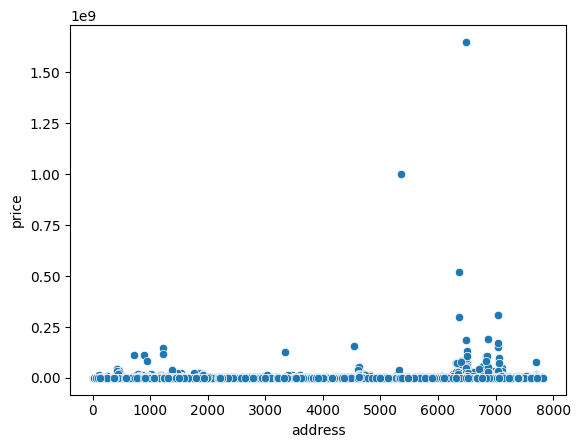

In [49]:
sb.scatterplot(x=df['address'], y=df['price'])


<Axes: xlabel='size', ylabel='price'>

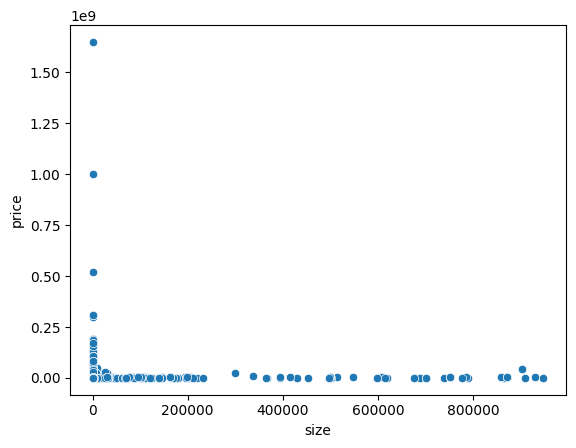

In [50]:
sb.scatterplot(x=df['size'], y=df['price'])

<Axes: xlabel='building_age', ylabel='price'>

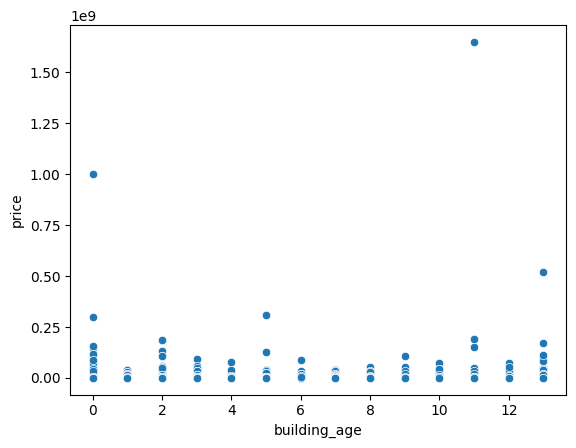

In [51]:
sb.scatterplot(x=df['building_age'], y=df['price'])

Такая большая цена - выброс. От нее нужно избавиться, она никак не соотносится с главной причиной - площадью

In [52]:
df = df.drop(df[(df.price <= 2e+09) & (df.price >= 0.25e+06)].index)

<Axes: ylabel='price'>

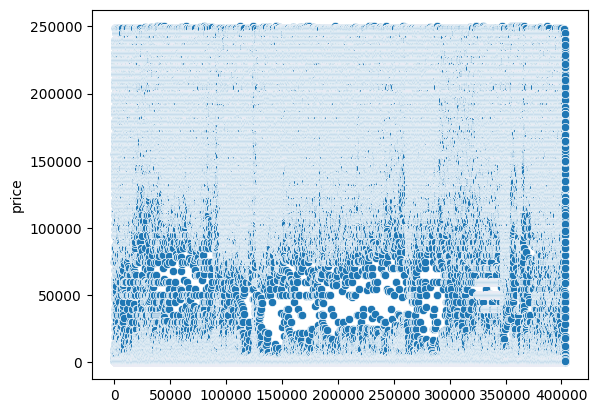

In [53]:
sb.scatterplot(x=df.index, y=df['price'])


Теперь цены лежат в более равных диапазонах

<Axes: xlabel='size', ylabel='price'>

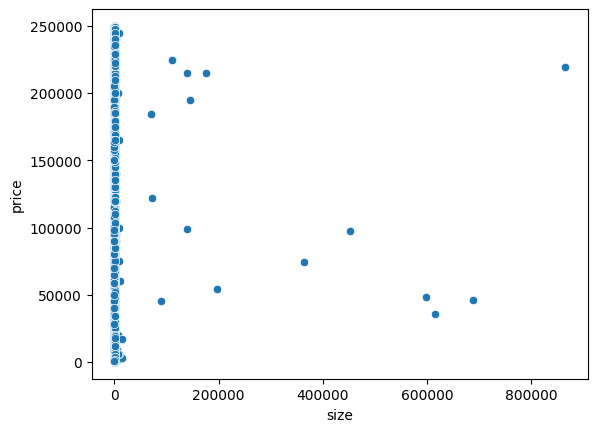

In [54]:
sb.scatterplot(x=df['size'], y=df['price'])


Теперь график выглядит куда лучше

А на графике посмотрю на площадь

<Axes: ylabel='size'>

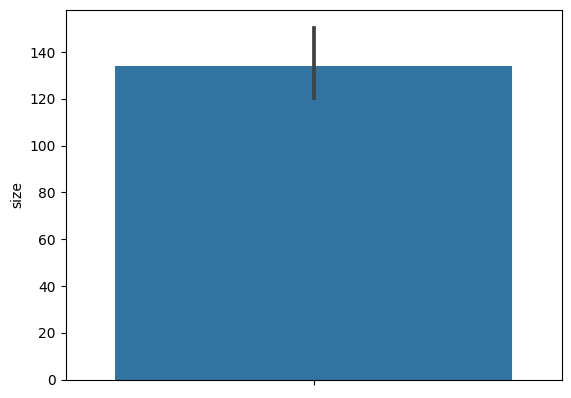

In [55]:
sb.barplot(y=df['size'])

Так ничего не видно

<Axes: ylabel='size'>

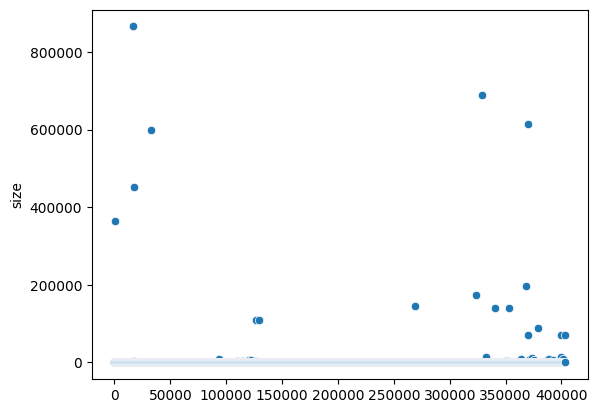

In [56]:
sb.scatterplot(x=df.index, y=df['size'])

Не смотря на большие площади, это не исключение, а просто большое жилье

In [57]:
df.count()

sub_type             240919
start_date           240919
end_date             240919
listing_type         240919
tom                  240919
building_age         240919
total_floor_count    240919
floor_no             240919
room_count           240919
size                 240919
address              240919
heating_type         240919
price                240919
dtype: int64

In [58]:
correlation = df.corr()

<Axes: >

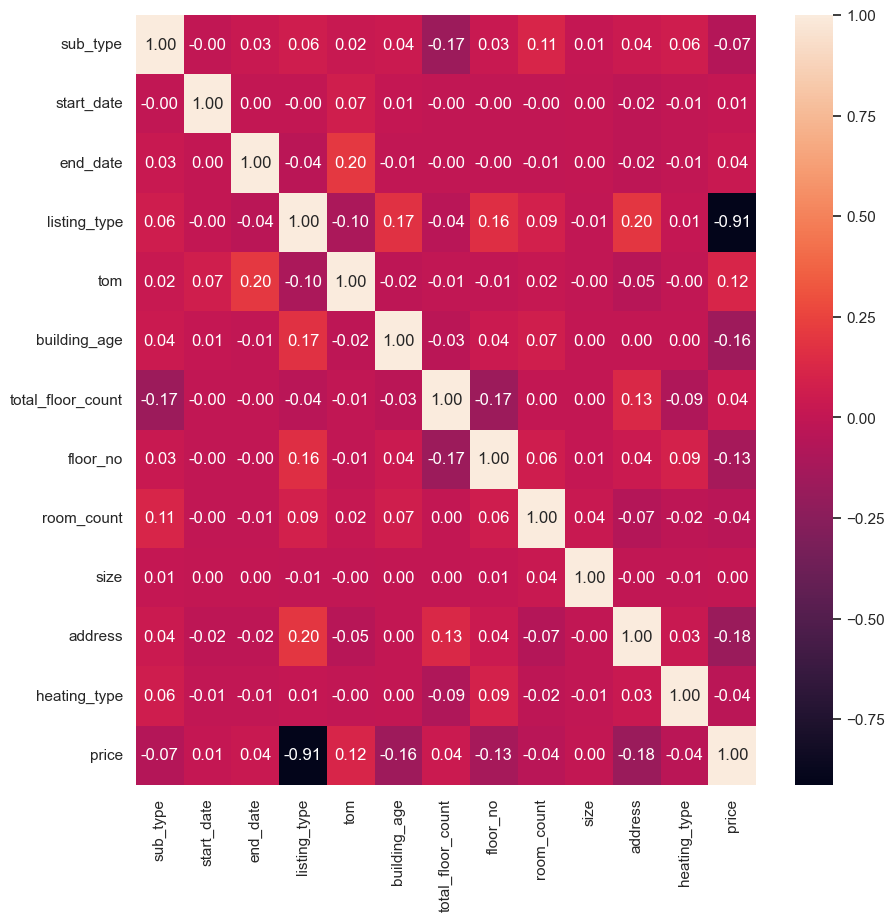

In [59]:
sb.set(rc={'figure.figsize': (10, 10)})
sb.heatmap(correlation, annot=True, fmt='.2f',)

In [60]:
MINIMAL_COFF = 0.1


filtered_df = pd.DataFrame()


for column in correlation.columns:
    current_coff = round(correlation[column]['price'], 2)
    if abs(current_coff) >= abs(MINIMAL_COFF):
        filtered_df[column] = df[column]

<Axes: >

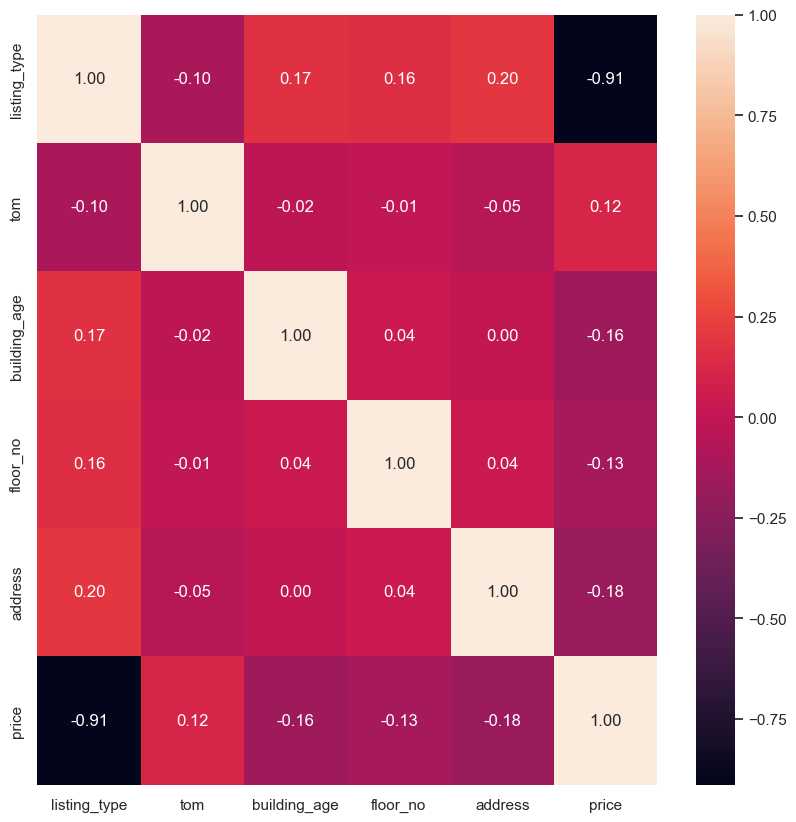

In [61]:
sb.heatmap(filtered_df.corr(), annot=True, fmt='.2f',)


Получилась вот такая выборка

Небогато, но пойдет

## Разбиение и скалирование

In [62]:
x = filtered_df.drop(columns=['price'])
y = filtered_df.price

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

Разбиваем данные

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# Обучение моделей

Пройдемся по 4 моделям, которые в интернете считают популярными

In [67]:

from sklearn.metrics  import r2_score

In [68]:
scores = pd.DataFrame(columns=['name', 'score'])
results = {}


def learn_and_score(model, name: str,
                    X_train=x_train, X_test=x_test,
                    Y_train=y_train, Y_test=y_test,
                    retrain=False):

    score_slice = scores[scores['name'] == name]

    if len(score_slice) and not retrain:
        predicted = results.get(name)
        score = list(score_slice['score'])[0]
        return score, predicted

    model.fit(X_train, Y_train)
    predicted = model.predict(X_test)
    results[name] = predicted
    score = round(model.score(X_test, Y_test), 4)
    scores.loc[len(scores)] = [name, score]
    return score, predicted


def show_model_report(name, Y_test=y_test):
    predicted = results[name]
    score = list(scores[scores['name'] == name]['score'])[0]

    print(f'----{name}----')
    print(f'Model has {score} accuracy score')
    print('===================')
    # print(classification_report(Y_test, predicted))
    print(f'Squad determination score {round(r2_score(Y_test, predicted), 4)}')
    sb.kdeplot(Y_test, label='test value')
    sb.kdeplot(predicted, label='predicted')


def show_total_report():
    sb.barplot(scores, x='name', y='score')

## Линейная регрессия

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
linear = LinearRegression(n_jobs=-1)
LINEAR = 'linear'
learn_and_score(linear,LINEAR)

(0.8343,
 array([166662.00187906, 169987.28465309, 168415.2418444 , ...,
         13589.83835528, 170218.70993306, 167380.24424729]))

----linear----
Model has 0.8343 accuracy score
Squad determination score 0.8343


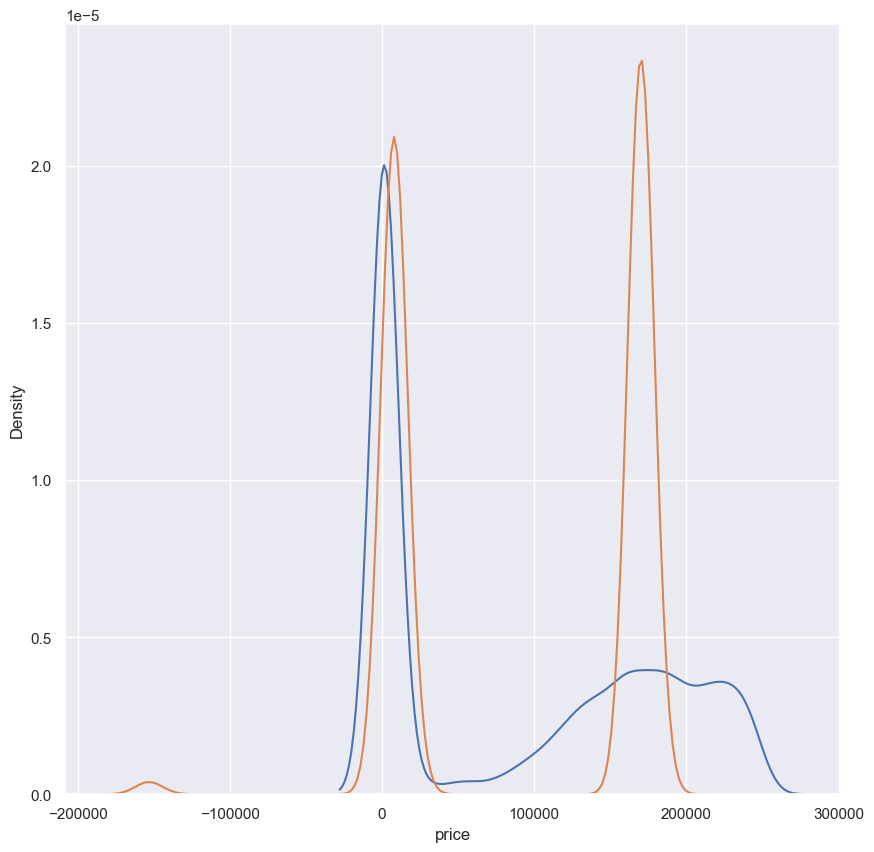

In [71]:
show_model_report(LINEAR)

Не очень хороший показатель, посмотрим, что будет дальше

## Lasso

Еще одна модель линейно регрессии

In [72]:
from sklearn.linear_model import Lasso

In [73]:
lasso = Lasso(random_state=42,)
LASSO = 'lasso'
learn_and_score(lasso, LASSO)

(0.8343,
 array([166664.899513  , 169985.52611283, 168417.03745986, ...,
         13589.08916466, 170219.36042038, 167382.45061725]))

----lasso----
Model has 0.8343 accuracy score
Squad determination score 0.8343


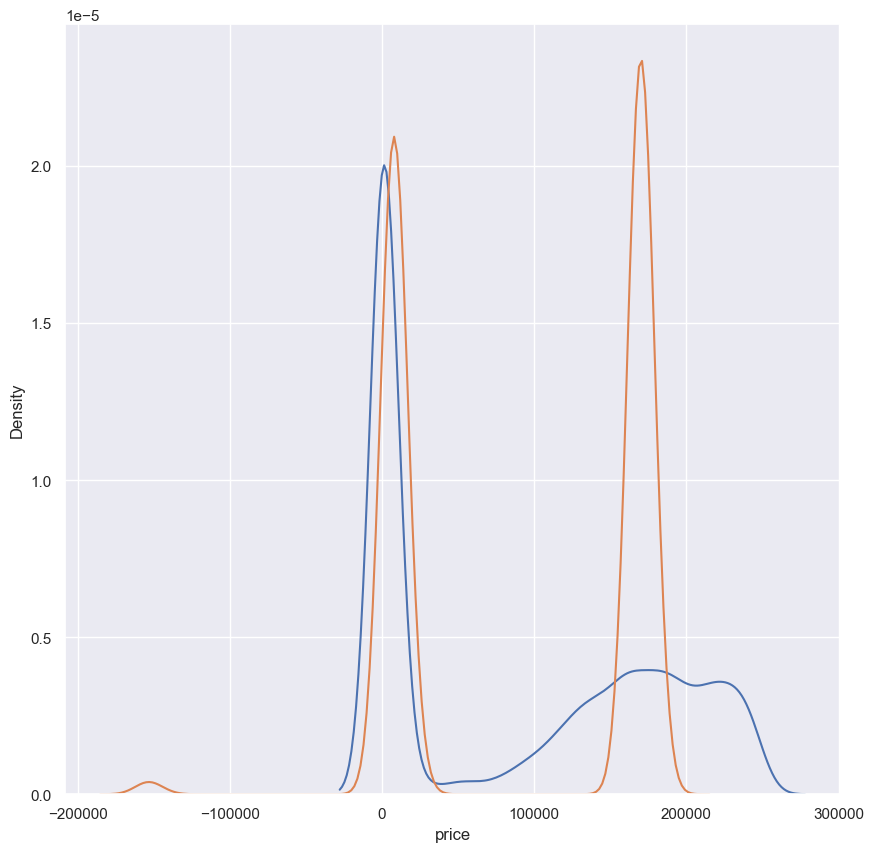

In [74]:
show_model_report(LASSO)

Показала себя абсолютно так же, как и линейная

Возможно, линейная регрессия не очень хорошо подходит для данных задач

В том топе все модели линейные, по этому больше не буду ему следовать. Попробую другие модели

## Случайный лес

Случайный лес не входив в эти четыре модели, но часто показывает себя очень хорошо

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
random_forest = RandomForestRegressor(random_state=42, n_jobs=-1)
RANDOM_FOREST = 'random_forest'
learn_and_score(random_forest, RANDOM_FOREST)

(0.8991,
 array([160476.66666667, 199265.        , 191700.        , ...,
          1153.35      , 207503.91      , 195371.66666667]))

----random_forest----
Model has 0.8991 accuracy score
Squad determination score 0.8991


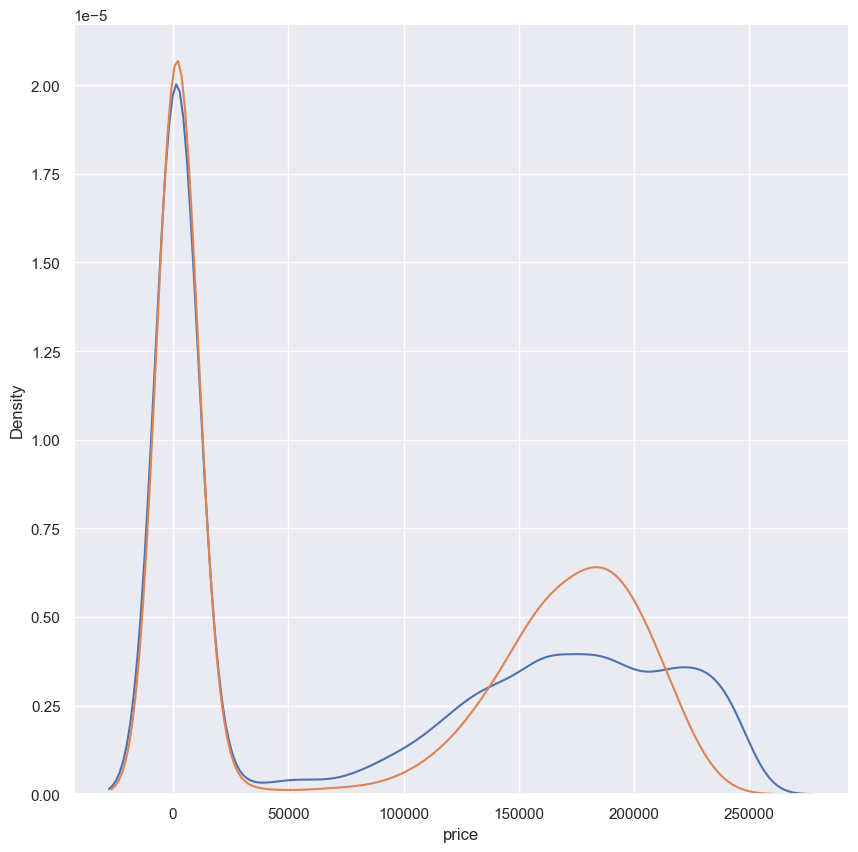

In [77]:
show_model_report(RANDOM_FOREST)

Показывает себя, пока что, лучше всего

## Дерево решений

Имеет ту же суть, что и лес, но в меньшем количестве. Иногда показывает себя лучше, чем лес

In [78]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
tree = DecisionTreeRegressor(random_state=42)
TREE ='tree'
_, predicted = learn_and_score(tree, TREE)

----tree----
Model has 0.8413 accuracy score
Squad determination score 0.8413


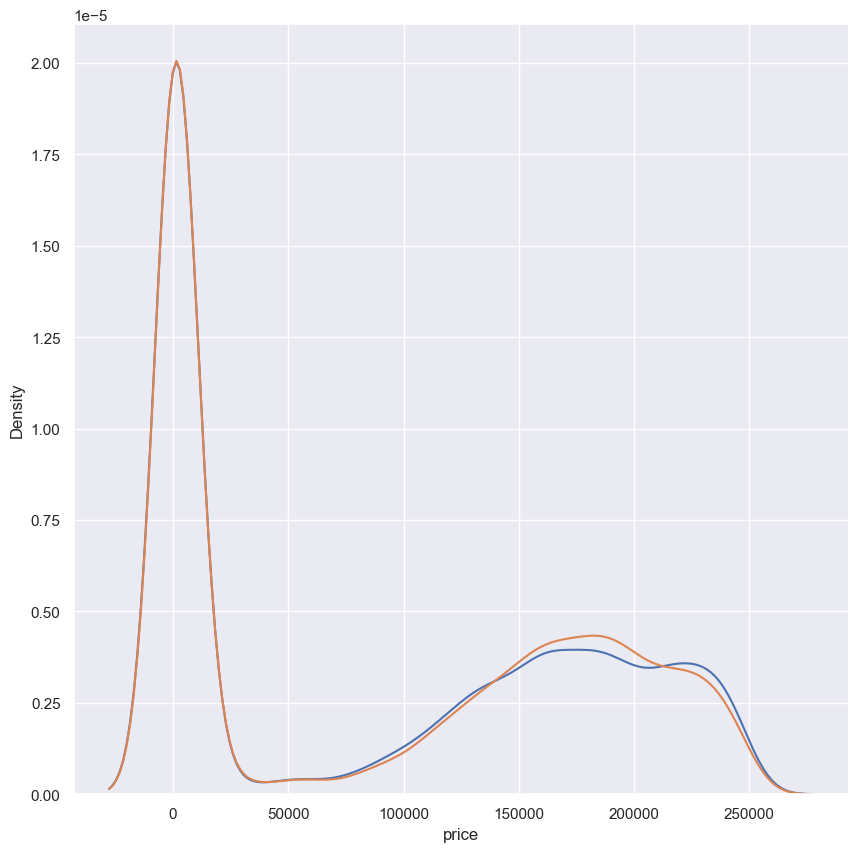

In [80]:
show_model_report(TREE)

В этот раз точность оказалась ниже, чем у леса, но есть хороший старт для улучшения

## Соседи

In [81]:
from sklearn.neighbors import KNeighborsRegressor

In [82]:
neighbors = KNeighborsRegressor(n_jobs=-1)
NEIGHBORS = 'neighbors'
learn_and_score(neighbors, NEIGHBORS)

(0.8664, array([159000., 213700., 166200., ...,    925., 201400., 137600.]))

----neighbors----
Model has 0.8664 accuracy score
Squad determination score 0.8664


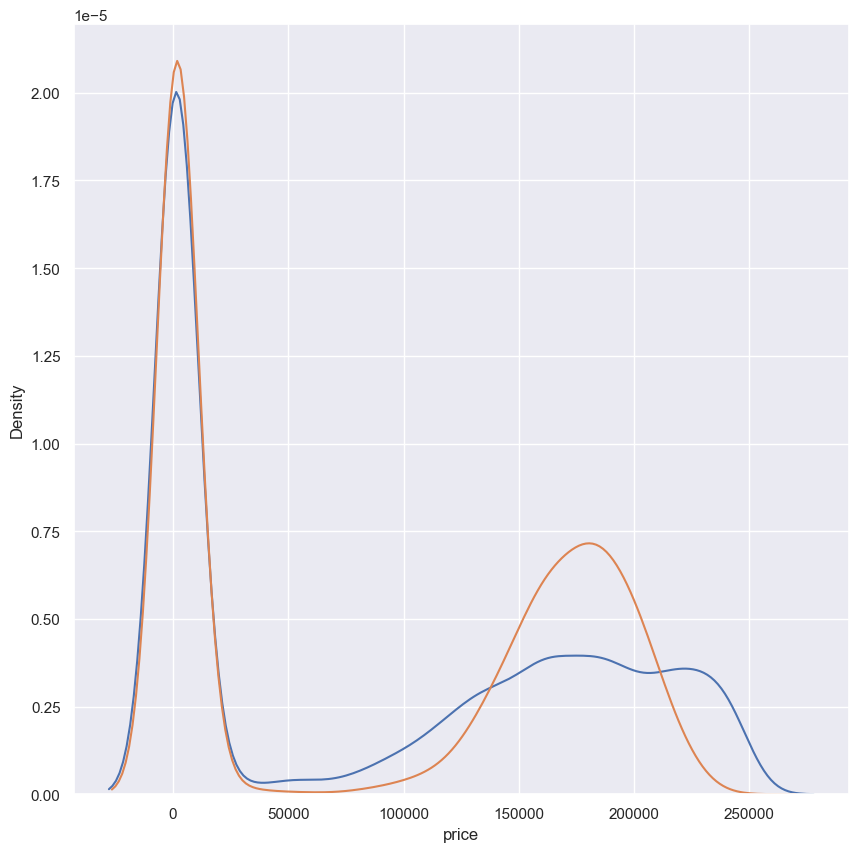

In [83]:
show_model_report(NEIGHBORS)

График выглядит более менее, местами очень близко подходя к оригиналу

# Промежуточные итоги

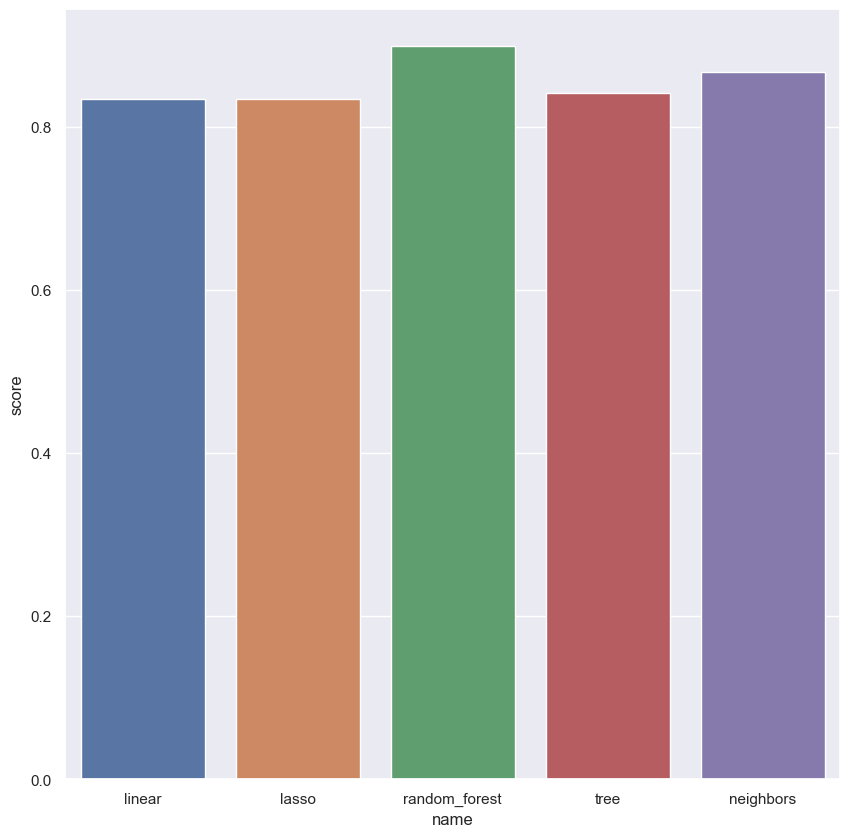

In [84]:
show_total_report()

Лучше всего показали себя дерево и лес. Они несут примерно один алгоритм, так что выберу только лес, как тот, у кого обычно показатели лучше. А вторую возьму соседей, как ту, которая мне нравится

In [85]:
from joblib import dump

In [86]:
dump(random_forest,'./models/estates_regressor.pkl')
dump(column_encoder, './data/prepared/estates_encoders.json')

['./data/prepared/estates_encoders.json']

# Гиперпараметры

In [232]:
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV

In [233]:
def randomized_search(model, params):
    randomized = RandomizedSearchCV(
        model, params, cv=5, n_jobs=-1, random_state=42,
        scoring='neg_mean_absolute_error',

        return_train_score=True)

    randomized.fit(x_train, y_train)

    result = pd.DataFrame(randomized.cv_results_).sort_values(
        'mean_test_score', ascending=False)

    return result, randomized

Вспомогательная функция для случайного поиска параметров

In [234]:
def grid_search(model, params):
    grid = GridSearchCV(
        model, params, cv=5, n_jobs=-1,
        scoring='neg_mean_absolute_error',
        return_train_score=True)

    grid.fit(x_train, y_train)

    return grid.best_params_, grid

Вспомогательная функция для точного поиска параметров

In [235]:
IN_ROW = 3


def show_results(df: pd.DataFrame, in_row=IN_ROW):
    filtered_columns = list(filter(
        lambda column: column.startswith('param_'), df.columns))
    print(filtered_columns)
    column_count = m.ceil(len(filtered_columns) / in_row)

    fig, axs = mpl.subplots(ncols=in_row, nrows=column_count)
    sb.set(style='whitegrid', color_codes=True)
    fig.set_size_inches(30, 25)

    for index, column in enumerate(filtered_columns):
        row = index // in_row
        col = index  % in_row
        sb.barplot(x=column, y='mean_test_score', data=df,
                   ax=axs[row, col])
    mpl.show()
    

## Лес

In [236]:
base_forest_params = {
    'n_estimators': np.arange(50, 600, 50),
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': np.arange(1, 10, 1),
    'min_samples_split': np.arange(2, 15, 1),
    'min_samples_leaf': np.arange(1, 15, 1),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False, None]
}

In [237]:
base_forest = RandomForestRegressor(random_state=42, n_jobs=-1)
base_forest_results, _ = randomized_search(base_forest, base_forest_params)

['param_n_estimators', 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_features', 'param_max_depth', 'param_criterion', 'param_bootstrap']


/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dis

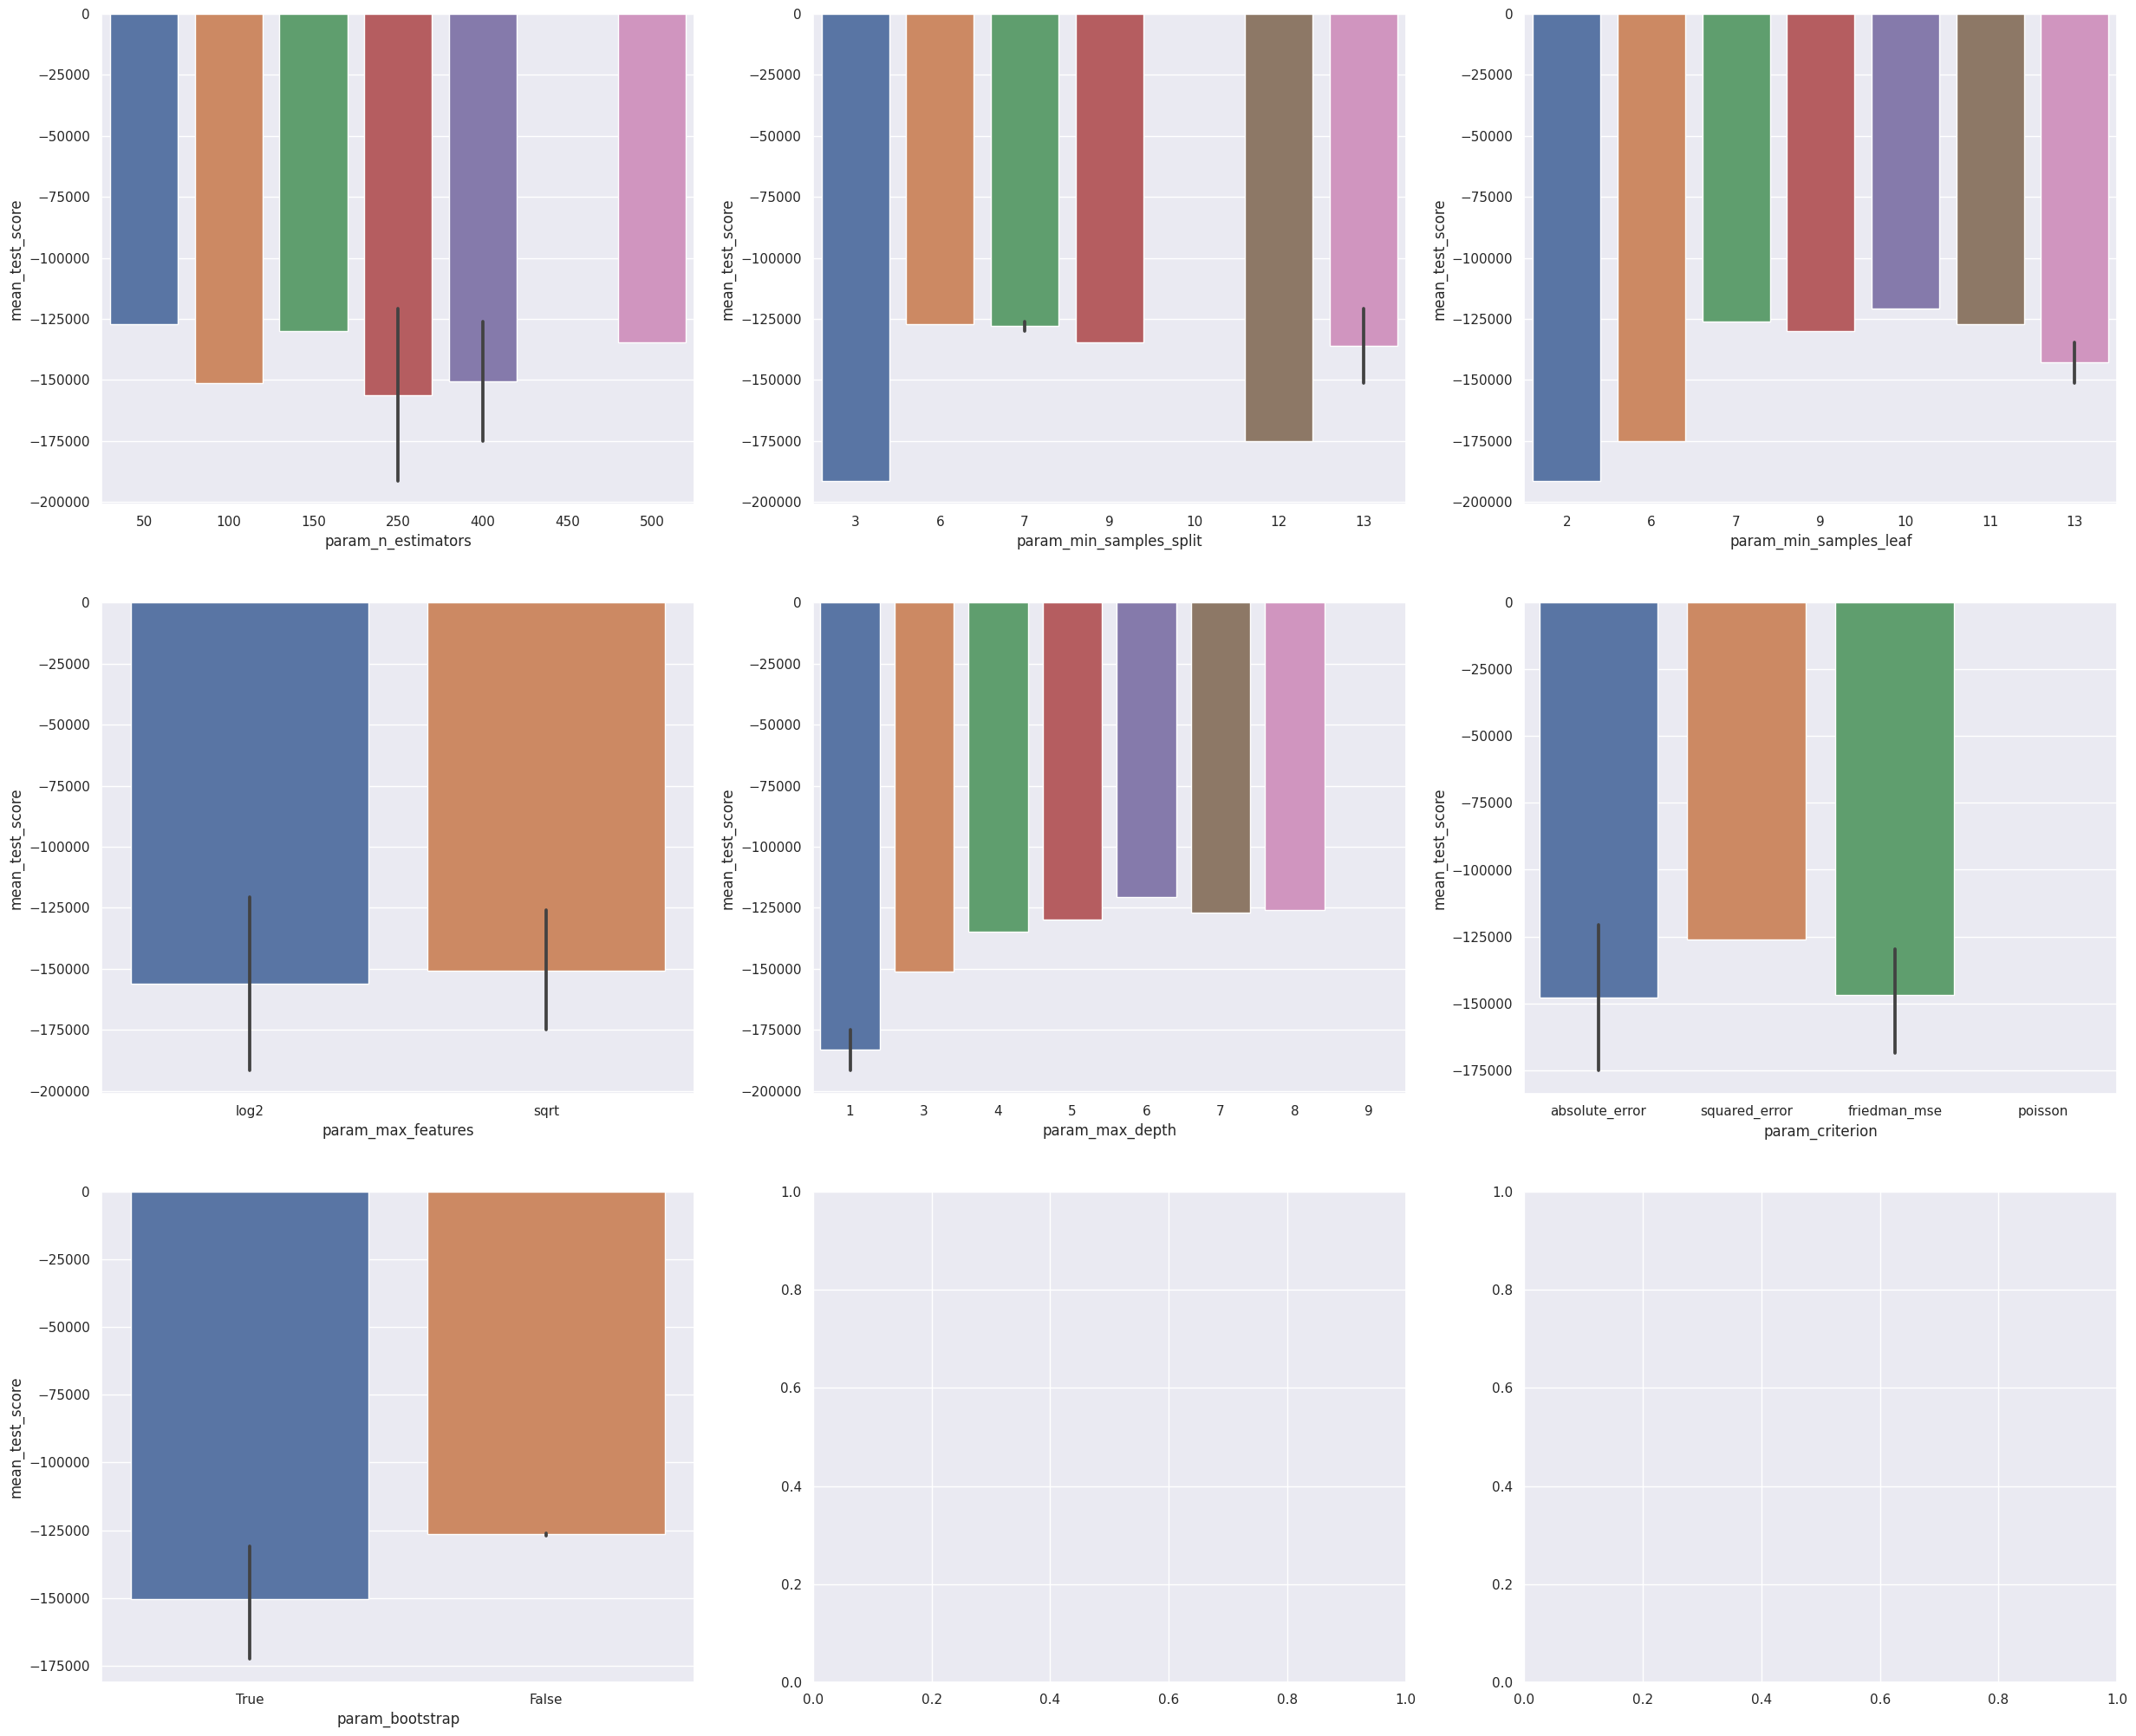

In [ ]:
show_results(base_forest_results)

Точно можно сказать
- max_depth - 6
- criterion - squared_error
- max_features - sqrt
- bootstrap - False


Нужно еще проверить
- min_samples_split - between 3 and 7
- min_samples_leaf - between 7 and 13
- n_estimators - between 0 and 200

In [ ]:
prebest_forest_params = {
    'max_depth': 6,
    'criterion':'squared_error',
    'max_features': 'sqrt',
    'bootstrap': False
}

grid_forest_params = {
    'min_samples_split': np.arange(3, 7, 1),
    'min_samples_leaf': np.arange(7, 13, 1),
    'n_estimators': np.arange(0, 200, 15)
}

In [ ]:
prebest_forest = RandomForestRegressor(random_state=42, n_jobs=-1, **prebest_forest_params)
best_forest_params, _ = grid_search(prebest_forest, grid_forest_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
240 fits failed out of a total of 3360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

In [ ]:
best_forest = RandomForestRegressor(random_state=42, n_jobs=-1, **prebest_forest_params, **best_forest_params)
BEST_FOREST = 'best_forest'
learn_and_score(best_forest, BEST_FOREST)

(0.5074,
 array([ 285164.89190632,  297139.97069285,    4421.81547036, ...,
           3333.20738362, 1073735.90666875,  297139.97069285]))

In [ ]:
show_model_report(BEST_FOREST)

----best_forest----
Model has 0.5074 accuracy score
Squad determination score 0.5074


Почему то у меня снова ничего не становится лучше. Какие то не те параметры я подбираю

## Соседи

In [ ]:
neighbors_params = {
    'n_neighbors': np.arange(1, 15, 1),
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "leaf_size": np.arange(5, 50, 1),
    'p': np.arange(1, 10, 1)
}

In [ ]:
base_neighbors = KNeighborsRegressor(n_jobs=-1)
neighbors_results, _ = randomized_search(base_neighbors, neighbors_params)

['param_p', 'param_n_neighbors', 'param_leaf_size', 'param_algorithm']


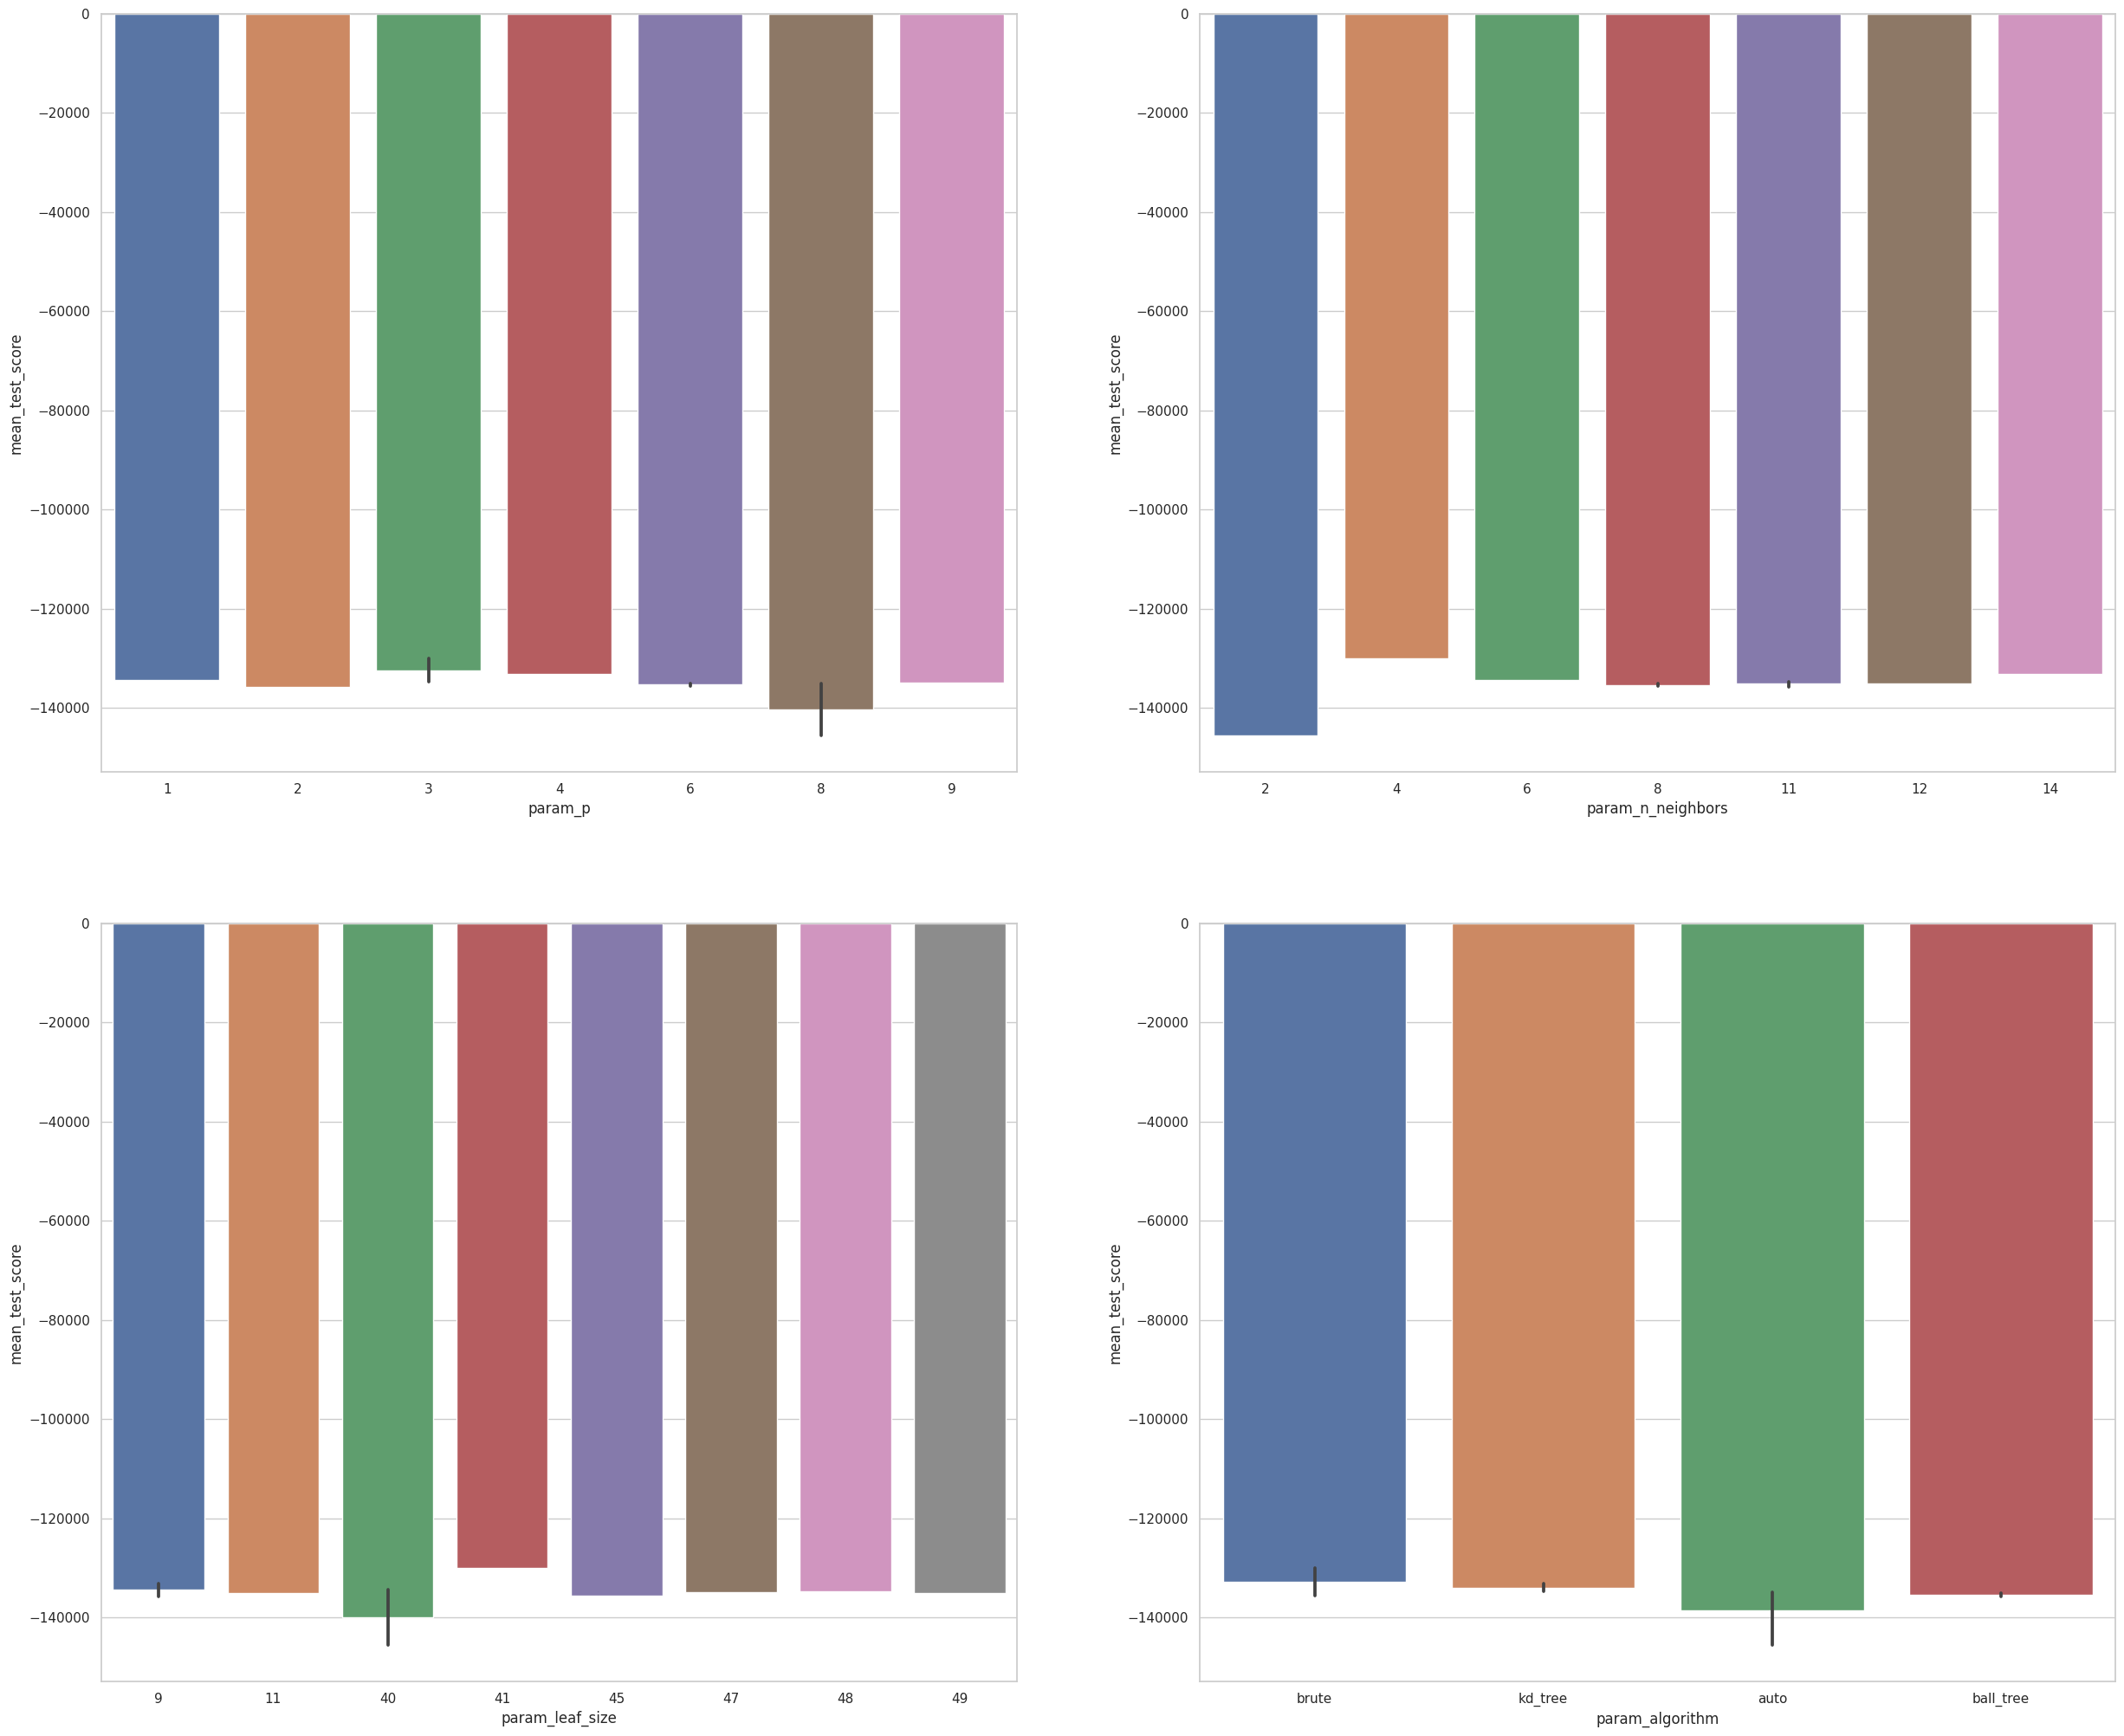

In [ ]:
show_results(neighbors_results, 2)

Точно можно сказать
- p - 3
- n_neighbors - 4
- algorithm - auto


Нужно еще проверить
- leaf_size - between 40 and 45

In [ ]:
prebest_neighbors_parmas = {
    'p':3,
    'n_neighbors': 4,
    'algorithm': 'auto'
}

grid_neighbors_params = {
    'leaf_size': np.arange(40, 45, 1)
}

In [ ]:
prebest_neighbors = KNeighborsRegressor(n_jobs=-1, **prebest_neighbors_parmas)
best_neighbors_params, _ = grid_search(prebest_neighbors, grid_neighbors_params)


In [ ]:
best_neighbors = KNeighborsRegressor(n_jobs=-1, **prebest_neighbors_parmas, **best_neighbors_params)
BEST_NEIGHBORS = 'best_neighbors'
learn_and_score(best_neighbors, BEST_NEIGHBORS)

(0.438,
 array([239500. , 196250. ,   1087.5, ...,   1187.5, 960000. , 196250. ]))

In [ ]:
show_model_report(BEST_NEIGHBORS)

----best_neighbors----
Model has 0.438 accuracy score
Squad determination score 0.438


Модель стала на 2 пп хуже. Возможно, я что то делаю не то

## Линейная модель

In [ ]:
linear_params = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

In [ ]:
base_linear = LinearRegression(n_jobs=-1)
best_linear_params, _ = grid_search(base_linear, linear_params)


In [ ]:
best_linear = LinearRegression(n_jobs=-1, **best_linear_params)
BEST_LINEAR='best_linear'
learn_and_score(best_linear, BEST_LINEAR)

(0.3315,
 array([ 291584.09004985,  433004.74489046,   40818.42770278, ...,
        -100602.22713783,  881518.5702012 ,  433004.74489046]))

In [ ]:
show_model_report(BEST_LINEAR)

----best_linear----
Model has 0.3315 accuracy score
Squad determination score 0.3315


Результаты остаись примерно на том же уровне. Это досадно

# Итоги

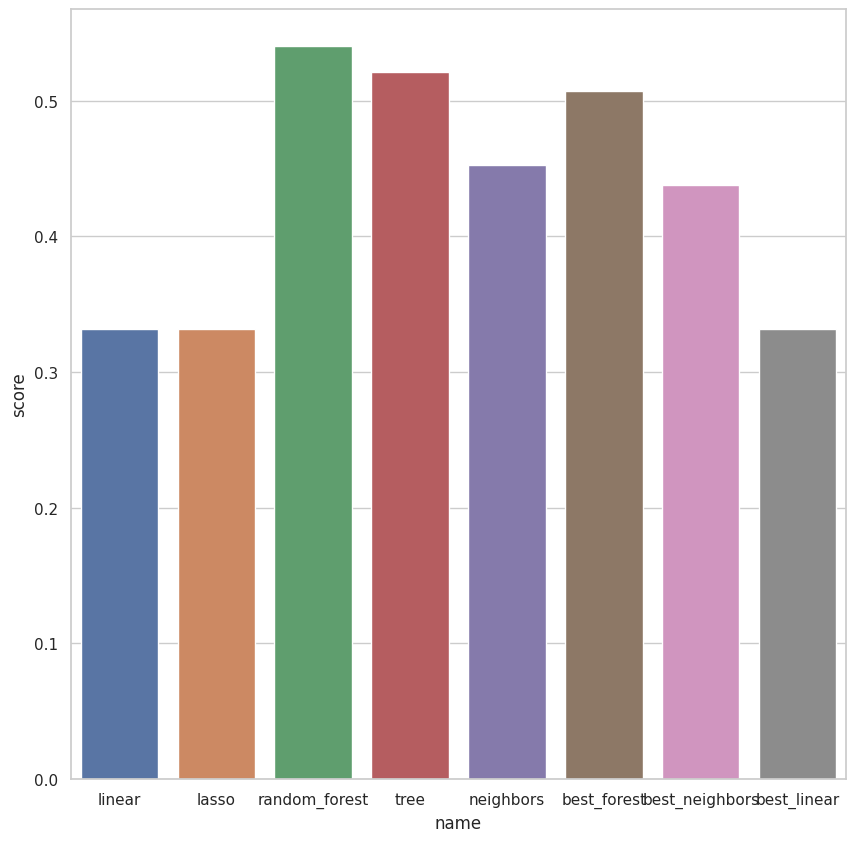

In [ ]:
show_total_report()

Лучше всего себя показал стандартный случайный лес, улучшения не приведи ни к чему, почему то